# Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from numpy import where

%pip install xgboost

In [ ]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

def cek_duplikat(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

## Tabel Scores

In [ ]:
df_scores = pd.read_csv('scores.csv')
df_scores

,No,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,0,60894,8419.0,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,1,60894,466.0,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,2,60894,3712.0,diaamond,Boos,sova,226.0,17.0,9.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,3,60894,5099.0,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,4,60894,3983.0,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128774,157934,13,24.0,Gover,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128775,157935,13,25.0,Jack1,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128776,157936,13,26.0,Rewind,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128777,157937,13,27.0,Woo1y,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_games = pd.read_csv('games.csv')
df_games

,No,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds
0,0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7
1,1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,2,3.0,3.0,5.0,4.0,2,2.0,0.0,4.0,9.0,13
2,2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,2.0,5.0,12.0,13,2.0,2.0,6.0,11.0,8
3,3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,1,2.0,2.0,4.0,11.0,13,4.0,1.0,2.0,12.0,6
4,4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,1,4.0,2.0,3.0,13.0,13,3.0,3.0,4.0,12.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12956,15883,6,10,Haven,4,11,smoke,Obey Alliance,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12957,15884,8,12,Bind,10,8,Highground,JSD,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12958,15885,4,8,Haven,4,6,smoke,Orgless,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12959,15886,3,7,Split,4,5,smoke,Last Minute Heroes,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [ ]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128779 entries, 0 to 128778
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   No                128779 non-null  int64  
 1   GameID            128779 non-null  int64  
 2   PlayerID          128692 non-null  float64
 3   PlayerName        128779 non-null  object 
 4   TeamAbbreviation  126763 non-null  object 
 5   Agent             124679 non-null  object 
 6   ACS               128249 non-null  float64
 7   Kills             128289 non-null  float64
 8   Deaths            128289 non-null  float64
 9   Assists           128289 non-null  float64
 10  PlusMinus         127026 non-null  float64
 11  KAST_Percent      2637 non-null    float64
 12  ADR               119904 non-null  float64
 13  HS_Percent        119307 non-null  float64
 14  FirstKills        128249 non-null  float64
 15  FirstDeaths       119314 non-null  float64
 16  FKFD_PlusMinus    11

In [ ]:
cek_null(df_scores)

                   Total    Percent
KAST_Percent      126142  97.952306
Defuses            10195   7.916663
OnevThree          10195   7.916663
Num_3Ks            10195   7.916663
Num_2Ks            10195   7.916663
OnevOne            10195   7.916663
Num_5Ks            10195   7.916663
OnevTwo            10195   7.916663
Num_4Ks            10195   7.916663
OnevFour           10195   7.916663
OnevFive           10195   7.916663
Econ               10195   7.916663
Plants             10195   7.916663
HS_Percent          9472   7.355236
FirstDeaths         9465   7.349801
FKFD_PlusMinus      9465   7.349801
ADR                 8875   6.891652
Agent               4100   3.183749
TeamAbbreviation    2016   1.565473
PlusMinus           1753   1.361247
FirstKills           530   0.411558
ACS                  530   0.411558
Assists              490   0.380497
Deaths               490   0.380497
Kills                490   0.380497
PlayerID              87   0.067558


Kolom `KAST_Percent` memiliki banyak nilai `NULL` dan kolom `PlayerID` serta `No` tidak relevan untuk dijadikan fitur karena merupakan identifier.

In [ ]:
df_scores_col_drop = df_scores.drop(['KAST_Percent', 'PlayerID', 'No'], axis=1)
df_scores_col_drop

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128774,13,Gover,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128775,13,Jack1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128776,13,Rewind,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128777,13,Woo1y,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cek_null(df_scores_col_drop)

                  Total   Percent
Defuses           10195  7.916663
Num_2Ks           10195  7.916663
Plants            10195  7.916663
Econ              10195  7.916663
OnevFive          10195  7.916663
OnevFour          10195  7.916663
OnevThree         10195  7.916663
OnevTwo           10195  7.916663
OnevOne           10195  7.916663
Num_5Ks           10195  7.916663
Num_4Ks           10195  7.916663
Num_3Ks           10195  7.916663
HS_Percent         9472  7.355236
FKFD_PlusMinus     9465  7.349801
FirstDeaths        9465  7.349801
ADR                8875  6.891652
Agent              4100  3.183749
TeamAbbreviation   2016  1.565473
PlusMinus          1753  1.361247
FirstKills          530  0.411558
ACS                 530  0.411558
Assists             490  0.380497
Deaths              490  0.380497
Kills               490  0.380497


Terlihat bahwa `FirstKills`, `ACS`, `Assists`, `Deaths`, `Kills` memiliki beberapa nilai `NULL`. Karena nilai-nilai tersebut tidak dapat diganti dan hanya mengambil proposi sedikit dari keseluruhan data (kurang dari 0.5%), maka row-row tersebut didrop.

Terlihat juga bahwa terdapat row yang memiliki kolom `Agent` kosong. Sulit untuk menginfer agent yang dipilih dalam sebuah game karena terdapat constraint dimana tiap agent yang dipilih pemain dalam sebuah tim harus **unik**. Selain itu, `TeamAbbreviation` juga sulit diinfer karena terdapat constraint bahwa dalam tiap game, sebuah tim harus punya tepat 5 pemain.

In [ ]:
df_scores_null_drop = df_scores_col_drop.dropna(subset=['FirstKills', 'ACS', 'Assists', 'Deaths', 'Kills', 'Agent', 'TeamAbbreviation'])
df_scores_null_drop

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127989,221,chiwawa,WP,sage,312.0,28.0,14.0,11.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127990,221,arch,WP,phoenix,255.0,20.0,18.0,9.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127991,221,TayS,WP,cypher,240.0,23.0,17.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127992,221,Duno,WP,sova,163.0,12.0,17.0,10.0,-5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cek_null(df_scores_null_drop)

                Total   Percent
Defuses          5865  4.777498
Num_2Ks          5865  4.777498
Plants           5865  4.777498
Econ             5865  4.777498
OnevFive         5865  4.777498
OnevFour         5865  4.777498
OnevThree        5865  4.777498
OnevTwo          5865  4.777498
OnevOne          5865  4.777498
Num_5Ks          5865  4.777498
Num_4Ks          5865  4.777498
Num_3Ks          5865  4.777498
HS_Percent       5142  4.188558
FKFD_PlusMinus   5135  4.182856
FirstDeaths      5135  4.182856
ADR              4691  3.821184


In [ ]:
df_scores_null_drop_2 = df_scores_null_drop.dropna(subset=['Defuses'])
df_scores_null_drop_2

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120602,2309,QUERNI,GRG,omen,227.0,13.0,12.0,1.0,1.0,124.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0
120603,2309,bmblbe,GRG,phoenix,110.0,4.0,13.0,4.0,-9.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,2.0
120604,2309,DcTzR,GRG,jett,98.0,4.0,15.0,0.0,-11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
120605,2309,FRESHY,GRG,sova,91.0,3.0,14.0,4.0,-11.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1.0,0.0


In [ ]:
cek_null(df_scores_null_drop_2)

            Total   Percent
HS_Percent      7  0.005988


In [ ]:
df_scores_filled = df_scores_null_drop_2.fillna(df_scores_null_drop_2['HS_Percent'].mean(), inplace=False)
cek_null(df_scores_filled)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
df_scores_filled

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120602,2309,QUERNI,GRG,omen,227.0,13.0,12.0,1.0,1.0,124.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0
120603,2309,bmblbe,GRG,phoenix,110.0,4.0,13.0,4.0,-9.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,2.0
120604,2309,DcTzR,GRG,jett,98.0,4.0,15.0,0.0,-11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
120605,2309,FRESHY,GRG,sova,91.0,3.0,14.0,4.0,-11.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1.0,0.0


### Memastikan Setiap Game Memiliki Pemain 10

In [ ]:
scores_by_game_id = df_scores_filled.groupby('GameID').size()
valid_game_list = scores_by_game_id[scores_by_game_id == 10].index
df_scores_final = df_scores_filled[df_scores_filled['GameID'].isin(valid_game_list)]
df_scores_final

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,0.0
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,3.0,0.0
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120602,2309,QUERNI,GRG,omen,227.0,13.0,12.0,1.0,1.0,124.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0
120603,2309,bmblbe,GRG,phoenix,110.0,4.0,13.0,4.0,-9.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,2.0
120604,2309,DcTzR,GRG,jett,98.0,4.0,15.0,0.0,-11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
120605,2309,FRESHY,GRG,sova,91.0,3.0,14.0,4.0,-11.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1.0,0.0


## Cek Duplikat

In [ ]:
cek_duplikat(df_scores_final)

Jumlah duplikasi data : 0


In [ ]:
df_scores_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108250 entries, 0 to 120606
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GameID            108250 non-null  int64  
 1   PlayerName        108250 non-null  object 
 2   TeamAbbreviation  108250 non-null  object 
 3   Agent             108250 non-null  object 
 4   ACS               108250 non-null  float64
 5   Kills             108250 non-null  float64
 6   Deaths            108250 non-null  float64
 7   Assists           108250 non-null  float64
 8   PlusMinus         108250 non-null  float64
 9   ADR               108250 non-null  float64
 10  HS_Percent        108250 non-null  float64
 11  FirstKills        108250 non-null  float64
 12  FirstDeaths       108250 non-null  float64
 13  FKFD_PlusMinus    108250 non-null  float64
 14  Num_2Ks           108250 non-null  float64
 15  Num_3Ks           108250 non-null  float64
 16  Num_4Ks           10

# Tabel Games

In [ ]:
df_games = pd.read_csv('games.csv')
df_games

,No,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds
0,0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7
1,1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,2,3.0,3.0,5.0,4.0,2,2.0,0.0,4.0,9.0,13
2,2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,2.0,5.0,12.0,13,2.0,2.0,6.0,11.0,8
3,3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,1,2.0,2.0,4.0,11.0,13,4.0,1.0,2.0,12.0,6
4,4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,1,4.0,2.0,3.0,13.0,13,3.0,3.0,4.0,12.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12956,15883,6,10,Haven,4,11,smoke,Obey Alliance,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12957,15884,8,12,Bind,10,8,Highground,JSD,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12958,15885,4,8,Haven,4,6,smoke,Orgless,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12959,15886,3,7,Split,4,5,smoke,Last Minute Heroes,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 12961 non-null  int64  
 1   GameID             12961 non-null  int64  
 2   MatchID            12961 non-null  int64  
 3   Map                12961 non-null  object 
 4   Team1ID            12961 non-null  int64  
 5   Team2ID            12961 non-null  int64  
 6   Team1              12961 non-null  object 
 7   Team2              12961 non-null  object 
 8   Winner             12961 non-null  int64  
 9   Team1_Eco          11927 non-null  float64
 10  Team1_SemiEco      11927 non-null  float64
 11  Team1_SemiBuy      11927 non-null  float64
 12  Team1_FullBuy      11927 non-null  float64
 13  Team1_TotalRounds  12961 non-null  int64  
 14  Team2_Eco          11927 non-null  float64
 15  Team2_SemiEco      11927 non-null  float64
 16  Team2_SemiBuy      119

Karena `No` merupakan identifier yang tidak relevan, maka dihapus.

In [ ]:
df_games_col_drop = df_games.drop(['No'], axis=1)
df_games_col_drop

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_Eco,Team1_SemiEco,Team1_SemiBuy,Team1_FullBuy,Team1_TotalRounds,Team2_Eco,Team2_SemiEco,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,0.0,5.0,13.0,13,4.0,2.0,4.0,10.0,7
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,2,3.0,3.0,5.0,4.0,2,2.0,0.0,4.0,9.0,13
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,1,2.0,2.0,5.0,12.0,13,2.0,2.0,6.0,11.0,8
3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,1,2.0,2.0,4.0,11.0,13,4.0,1.0,2.0,12.0,6
4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,1,4.0,2.0,3.0,13.0,13,3.0,3.0,4.0,12.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12956,6,10,Haven,4,11,smoke,Obey Alliance,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12957,8,12,Bind,10,8,Highground,JSD,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12958,4,8,Haven,4,6,smoke,Orgless,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
12959,3,7,Split,4,5,smoke,Last Minute Heroes,2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [ ]:
cek_null(df_games_col_drop)

               Total   Percent
Team1_SemiEco   1034  7.977779
Team1_SemiBuy   1034  7.977779
Team2_FullBuy   1034  7.977779
Team2_SemiBuy   1034  7.977779
Team2_SemiEco   1034  7.977779
Team2_Eco       1034  7.977779
Team1_FullBuy   1034  7.977779
Team1_Eco       1034  7.977779


In [ ]:
df_games_drop = df_games_col_drop.dropna(subset=['Team1_Eco'])
cek_null(df_games_drop)

Empty DataFrame
Columns: [Total, Percent]
Index: []


Map dengan value `TBD` sudah ikut terdrop.

In [ ]:
df_games_drop['Map'].unique()

array(['Breeze', 'Bind', 'Haven', 'Icebox', 'Ascent', 'Split', 'Fracture'],
      dtype=object)

## Cek Duplikat

In [ ]:
cek_duplikat(df_games_drop)

Jumlah duplikasi data : 0


In [ ]:
df_games_final = df_games_drop

In [ ]:
df_games_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11927 entries, 0 to 12130
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GameID             11927 non-null  int64  
 1   MatchID            11927 non-null  int64  
 2   Map                11927 non-null  object 
 3   Team1ID            11927 non-null  int64  
 4   Team2ID            11927 non-null  int64  
 5   Team1              11927 non-null  object 
 6   Team2              11927 non-null  object 
 7   Winner             11927 non-null  int64  
 8   Team1_Eco          11927 non-null  float64
 9   Team1_SemiEco      11927 non-null  float64
 10  Team1_SemiBuy      11927 non-null  float64
 11  Team1_FullBuy      11927 non-null  float64
 12  Team1_TotalRounds  11927 non-null  int64  
 13  Team2_Eco          11927 non-null  float64
 14  Team2_SemiEco      11927 non-null  float64
 15  Team2_SemiBuy      11927 non-null  float64
 16  Team2_FullBuy      119

# Tabel Matches

In [ ]:
df_match = pd.read_csv('matches.csv')

Karena `No` merupakan identifier yang tidak relevan, maka dihapus.

In [ ]:
df_match = df_match.drop(['No'], axis=1)
df_match

,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,62393,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,62403,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C),7046,7047,Bjor's Kittens,Mugiwara,2,0
2,62391,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (A),6461,6903,Akrew,Booster Seat Gaming,2,1
3,62396,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (B),6164,7043,Radiance,sameROFLMAO,2,0
4,62402,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Elimination (C),7047,3545,Mugiwara,CLG Red,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6396,10,2020-05-02 15:00:00,NaN,2,Valhalla Invitational,Week 1: Group A,4,11,smoke,Obey Alliance,1,0
6397,12,2020-05-02 15:00:00,NaN,2,Valhalla Invitational,Week 1: Group B,10,8,Highground,JSD,1,0
6398,8,2020-05-02 14:00:00,NaN,2,Valhalla Invitational,Week 1: Group A,4,6,smoke,Orgless,1,0
6399,7,2020-05-02 13:00:00,NaN,2,Valhalla Invitational,Week 1: Group A,4,5,smoke,Last Minute Heroes,1,0


## Mengganti nilai NaN pada tabel
Data patch yang digunakan diambil dari [Valorant Wiki](https://valorant.fandom.com/wiki/Patch_Notes)

In [ ]:
from datetime import datetime

start_patch0 = datetime(2020, 4, 15)
end_patch0 = datetime(2020, 6, 2)

start_patch1 = datetime(2020, 6, 2)
end_patch1 = datetime(2021, 1, 12)

start_patch2 = datetime(2021, 1, 12)
end_patch2 = datetime(2021, 6, 22)

start_patch3 = datetime(2021, 6, 22)
end_patch3 = datetime(2022, 1, 11)

def handle_patch_null(row):
    if pd.isnull(row['Patch']):
        date = row['Date'][:10]
        date_object = datetime.strptime(date, '%Y-%m-%d')
        if start_patch0 <= date_object < end_patch0:
            row['Patch'] = 'Patch 0.0'
        elif start_patch1 <= date_object < end_patch1:
            row['Patch'] = 'Patch 1.0'
        elif start_patch2 <= date_object < end_patch2:
            row['Patch'] = 'Patch 2.0'
        elif start_patch3 <= date_object < end_patch3:
            row['Patch'] = 'Patch 3.0'
    return row


In [ ]:
df_matches_final = df_match.apply(handle_patch_null, axis=1)

In [ ]:
df_matches_final['Patch'] = df_matches_final['Patch'].str.extract(r'(\d)\.\d+').astype(float)
df_matches_final['Patch'].value_counts()

3.0    2210
1.0    2085
2.0    2010
0.0      96
Name: Patch, dtype: int64

## Cek Missing Value

In [ ]:
cek_null(df_matches_final)

Empty DataFrame
Columns: [Total, Percent]
Index: []


## Cek Duplikat

In [ ]:
cek_duplikat(df_matches_final)

Jumlah duplikasi data : 0


# Menggabungkan Tabel

In [ ]:
print(df_scores_final.columns)
print(df_games_final.columns)
print(df_matches_final.columns)

Index(['GameID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS', 'Kills',
       'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills',
       'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks',
       'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive',
       'Econ', 'Plants', 'Defuses'],
      dtype='object')
Index(['GameID', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Team1', 'Team2',
       'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy',
       'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco', 'Team2_SemiEco',
       'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds'],
      dtype='object')
Index(['MatchID', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage',
       'Team1ID', 'Team2ID', 'Team1', 'Team2', 'Team1_MapScore',
       'Team2_MapScore'],
      dtype='object')


In [ ]:
print(f"Jumlah baris scores: {df_scores_final.count().unique()}")
print(f"Jumlah baris scores: {df_games_final.count().unique()}")
print(f"Jumlah baris scores: {df_matches_final.count().unique()}")

Jumlah baris scores: [108250]
Jumlah baris scores: [11927]
Jumlah baris scores: [6401]


## Menggabungkan Matches dengan Games

In [ ]:
df_matches_games = df_games_final.merge(df_matches_final, left_on='MatchID', right_on='MatchID')

## Menggabungkan Tabel secara keseluruhan

In [ ]:
df_final = df_scores_final.merge(df_matches_games, left_on='GameID', right_on='GameID')
df_final.columns

Index(['GameID', 'PlayerName', 'TeamAbbreviation', 'Agent', 'ACS', 'Kills',
       'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills',
       'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks',
       'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive',
       'Econ', 'Plants', 'Defuses', 'MatchID', 'Map', 'Team1ID_x', 'Team2ID_x',
       'Team1_x', 'Team2_x', 'Winner', 'Team1_Eco', 'Team1_SemiEco',
       'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco',
       'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds',
       'Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1ID_y',
       'Team2ID_y', 'Team1_y', 'Team2_y', 'Team1_MapScore', 'Team2_MapScore'],
      dtype='object')

# Hasil final

In [ ]:
cek_null(df_final)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
cek_duplikat(df_final)

Jumlah duplikasi data : 0


In [ ]:
df_final

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Patch,EventID,EventName,EventStage,Team1ID_y,Team2ID_y,Team1_y,Team2_y,Team1_MapScore,Team2_MapScore
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108245,2309,QUERNI,GRG,omen,227.0,13.0,12.0,1.0,1.0,124.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0
108246,2309,bmblbe,GRG,phoenix,110.0,4.0,13.0,4.0,-9.0,84.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0
108247,2309,DcTzR,GRG,jett,98.0,4.0,15.0,0.0,-11.0,56.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0
108248,2309,FRESHY,GRG,sova,91.0,3.0,14.0,4.0,-11.0,64.0,...,1.0,68,Mandatory.gg Cup #2,Tournament: Round of 128,545,560,ISOL-BULIL,GRANIT GAMING,1,0


# Data Preprocessing


In [ ]:
agent_encode_df = pd.read_csv('./agent_encode.csv')

In [ ]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
check_null(df_final)

Tidak ditemukan missing value pada dataset


In [ ]:
outliers = dict(check_outlier(df_final.select_dtypes(include=['int64'])).sum())

Outlier pada tiap atribut:
GameID                   0
MatchID               1060
Team1ID_x                0
Team2ID_x                0
Winner               25310
Team1_TotalRounds    31780
Team2_TotalRounds        0
EventID                  0
Team1ID_y                0
Team2ID_y                0
Team1_MapScore           0
Team2_MapScore        2260
dtype: int64


In [ ]:
from scipy.stats import zscore

# Assuming df is your dataframe
numeric_cols = ['Team1_TotalRounds', 'Team2_TotalRounds', 'Team1_MapScore', 'Team2_MapScore']  # example numeric columns

# Apply Z-score to identify outliers
z_scores = np.abs(zscore(df_final[numeric_cols]))

# Cap outliers beyond 3 standard deviations
df_capped = df_final[(z_scores < 3).all(axis=1)]

In [ ]:
numerical_columns = df_final.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_final.select_dtypes(include=['object']).columns

In [ ]:
df_final.head()

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Patch,EventID,EventName,EventStage,Team1ID_y,Team2ID_y,Team1_y,Team2_y,Team1_MapScore,Team2_MapScore
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


In [ ]:
df_final = pd.merge(df_final, agent_encode_df, on='Agent', how='left')
df_final.drop(columns=['Agent', 'Unnamed: 0', 'ACS'], inplace=True)
df_final.rename(columns={'Encode': 'AgentEncoded'}, inplace=True)

In [ ]:
df_final['AgentEncoded'].value_counts().sort_values(ascending=False)

1     16539
0     15936
13    10845
11     9118
6      9089
4      8382
8      6684
2      5974
7      5564
12     5053
5      4812
9      4469
15     2938
14     1761
3       786
10      151
16      149
Name: AgentEncoded, dtype: int64

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108250 entries, 0 to 108249
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GameID             108250 non-null  int64  
 1   PlayerName         108250 non-null  object 
 2   TeamAbbreviation   108250 non-null  object 
 3   Kills              108250 non-null  float64
 4   Deaths             108250 non-null  float64
 5   Assists            108250 non-null  float64
 6   PlusMinus          108250 non-null  float64
 7   ADR                108250 non-null  float64
 8   HS_Percent         108250 non-null  float64
 9   FirstKills         108250 non-null  float64
 10  FirstDeaths        108250 non-null  float64
 11  FKFD_PlusMinus     108250 non-null  float64
 12  Num_2Ks            108250 non-null  float64
 13  Num_3Ks            108250 non-null  float64
 14  Num_4Ks            108250 non-null  float64
 15  Num_5Ks            108250 non-null  float64
 16  On

In [ ]:
import pandas as pd

unique_counts = {}

for column in df_final.columns:
    if df_final[column].dtype == 'object':
        unique_values = df_final[column].nunique()
        unique_counts[column] = unique_values

for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique values.")


Column 'PlayerName' has 6650 unique values.
Column 'TeamAbbreviation' has 1586 unique values.
Column 'Map' has 7 unique values.
Column 'Team1_x' has 979 unique values.
Column 'Team2_x' has 1620 unique values.
Column 'Date' has 3520 unique values.
Column 'EventName' has 518 unique values.
Column 'EventStage' has 818 unique values.
Column 'Team1_y' has 987 unique values.
Column 'Team2_y' has 1635 unique values.


In [ ]:
df_final = pd.get_dummies(df_final, columns=['Map'], drop_first=True)
df_final.drop(columns=['PlayerName', 'TeamAbbreviation', 'Team1_x', 'Team2_x', 'Date', 'EventName', 'EventStage', 'Team1_y', 'Team2_y'], inplace=True)

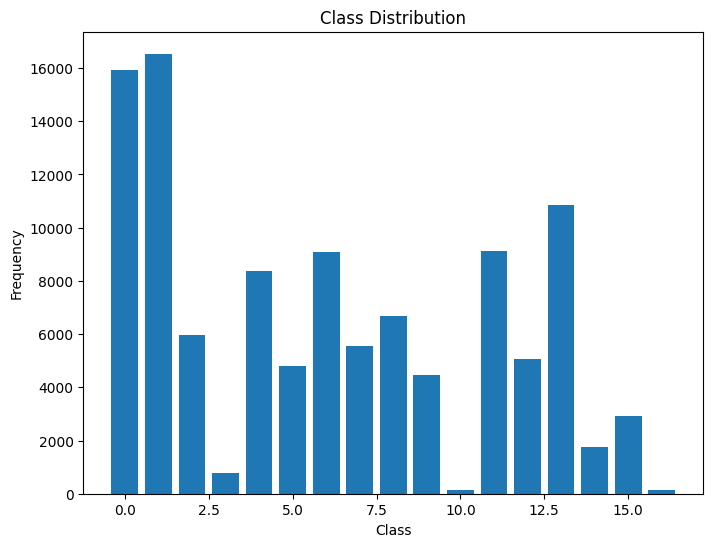

Class Frequencies:
 1     16539
0     15936
13    10845
11     9118
6      9089
4      8382
8      6684
2      5974
7      5564
12     5053
5      4812
9      4469
15     2938
14     1761
3       786
10      151
16      149
Name: AgentEncoded, dtype: int64

Class Proportions:
 1     0.152785
0     0.147215
13    0.100185
11    0.084231
6     0.083963
4     0.077432
8     0.061746
2     0.055187
7     0.051400
12    0.046679
5     0.044453
9     0.041284
15    0.027141
14    0.016268
3     0.007261
10    0.001395
16    0.001376
Name: AgentEncoded, dtype: float64

Imbalance Ratio: 111.0


In [ ]:
target_column = 'AgentEncoded'

# Calculate class frequencies
class_frequencies = df_final[target_column].value_counts()

# Calculate class proportions
class_proportions = df_final[target_column].value_counts(normalize=True)

# Calculate the imbalance ratio
imbalance_ratio = class_frequencies.max() / class_frequencies.min()

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_frequencies.index, class_frequencies.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

# Output class frequencies, proportions, and imbalance ratio
print("Class Frequencies:\n", class_frequencies)
print("\nClass Proportions:\n", class_proportions)
print("\nImbalance Ratio:", imbalance_ratio)

In [ ]:
X = df_final.drop('AgentEncoded', axis=1)
y = df_final['AgentEncoded']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# df_for_correlation = pd.concat([X, y], axis=1)
# correlation_matrix = df_for_correlation.corr()
# target_correlation = correlation_matrix['AgentEncoded'].drop('AgentEncoded').abs()
# target_correlation.sort_values(ascending=False)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
# rf_model.fit(X_train, y_train)

# y_pred_rf = rf_model.predict(X_test)
# evaluate_classifier_performance(y_test, y_pred_rf)

In [ ]:
classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(100),
    activation='relu',
    random_state=42,
)

steps = [('under', RandomUnderSampler(sampling_strategy='majority')), ('model', classifier)]
pipeline = Pipeline(steps=steps)

In [ ]:
pipeline.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('under', RandomUnderSampler(sampling_strategy='majority')),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=100,
                               random_state=42))])

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
# for i in range(len(scoring)):
#   score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
#   print(f"{scoring[i]} score: {np.mean(score)}")

# Data Prediction

In [ ]:
df_scores_test = pd.read_csv('./scores_test.csv')
df_games_test = pd.read_csv('./games_test.csv')
df_matches_test = pd.read_csv('./matches_test.csv')

df_scores_test_processed = df_scores_test.drop(['KAST_Percent', 'PlayerID', 'No'], axis=1)
df_scores_test_processed.fillna(df_scores_test_processed.median(), inplace=True)

df_games_test_processed = df_games_test.drop(['No'], axis=1)
df_games_test_processed.fillna(df_games_test_processed.median(), inplace=True)

df_matches_test_processed = df_matches_test.drop(['No'], axis=1)
df_matches_test_processed = df_matches_test_processed.apply(handle_patch_null, axis=1)
df_matches_test_processed['Patch'] = df_matches_test_processed['Patch'].str.extract(r'(\d)\.\d+').astype(float)
df_matches_test_processed.fillna(df_matches_test_processed.median(), inplace=True)

df_test_merged_1 = pd.merge(df_scores_test_processed, df_games_test_processed, on='GameID', how='left')
df_test_merged_final = pd.merge(df_test_merged_1, df_matches_test_processed, on='MatchID', how='left')

<ipython-input-62-de2baf86d746>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores_test_processed.fillna(df_scores_test_processed.median(), inplace=True)
<ipython-input-62-de2baf86d746>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_games_test_processed.fillna(df_games_test_processed.median(), inplace=True)
<ipython-input-62-de2baf86d746>:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None'

In [ ]:
df_test_merged_final = pd.get_dummies(df_test_merged_final, columns=['Map'], drop_first=True)

X_test = df_test_merged_final[df_final.drop(['AgentEncoded'], axis=1).columns]

X_test_scaled = scaler.transform(X_test)

y_test_pred = pipeline.predict(X_test_scaled)

submission = pd.DataFrame({
    'No': df_scores_test['No'],
    'Agent': y_test_pred
})

submission.head()

,No,Agent
0,100,2
1,101,4
2,102,2
3,103,2
4,104,4


In [ ]:
submission.to_csv('classify.csv', index=False)